In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Import the Data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.pop('bmi')

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [5]:
df.pop('work_type')

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
            ...      
5105          Private
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 5110, dtype: object

In [6]:
df.pop('ever_married')

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5105    Yes
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 5110, dtype: object

In [7]:
#Looking to see if there are more than 2 values
gender_value = df.groupby("gender").size()
gender_value

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [8]:
df.loc[(df['gender'] >= 'Other')]

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
3116,56156,Other,26.0,0,0,Rural,143.33,formerly smoked,0


In [9]:
#dropping outliar data for gender
df.drop(3116)

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Rural,166.29,formerly smoked,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 359.4+ KB


In [11]:
#Looking to see if there are more than 2 values
stroke = df['stroke']
stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [12]:
#Define y and X
y = df['stroke']
X = df.drop("stroke", axis=1)

In [13]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
#Looking for Missing Data
X_train.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
Residence_type       0
avg_glucose_level    0
smoking_status       0
dtype: int64

In [15]:
#Categorial Data
X_train_fill_na = X_train.copy()
X_train_categorical = X_train_fill_na.select_dtypes(exclude=['int64', 'float64']).copy()
X_train_categorical

,gender,Residence_type,smoking_status
2954,Female,Urban,Unknown
1933,Female,Urban,Unknown
4311,Female,Rural,never smoked
2365,Female,Urban,Unknown
927,Male,Urban,Unknown
...,...,...,...
4931,Female,Rural,smokes
3264,Female,Rural,formerly smoked
1653,Male,Rural,smokes
2607,Male,Urban,formerly smoked


In [31]:
#Categorical Data

categorical_features = ["smoking_status", "gender", "Residence_type", "hypertension"]
X_train_categorical = X_train_fill_na[categorical_features].copy()
X_train_categorical

,smoking_status,gender,Residence_type,hypertension
2954,Unknown,Female,Urban,0
1933,Unknown,Female,Urban,0
4311,never smoked,Female,Rural,0
2365,Unknown,Female,Urban,0
927,Unknown,Male,Urban,0
...,...,...,...,...
4931,smokes,Female,Rural,1
3264,formerly smoked,Female,Rural,0
1653,smokes,Male,Rural,0
2607,formerly smoked,Male,Urban,0


In [32]:
#Categorical Data

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

ohe.fit(X_train_categorical)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,Unknown,formerly smoked,never smoked,smokes,Female,Male,Other,Rural,Urban,0,1
2954,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1933,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4311,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2365,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
927,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3264,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2607,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [33]:
#Normalization 

numeric_features = ["avg_glucose_level", "age"]
X_train_numeric = X_train_fill_na[numeric_features].copy()
X_train_numeric

,avg_glucose_level,age
2954,70.54,18.0
1933,91.25,70.0
4311,205.78,65.0
2365,216.96,36.0
927,86.05,64.0
...,...,...
4931,98.61,53.0
3264,72.01,61.0
1653,94.71,44.0
2607,120.94,21.0


In [34]:
#Normalization

scaler = MinMaxScaler()

scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,avg_glucose_level,age
2954,0.071185,0.218750
1933,0.166790,0.853516
4311,0.695504,0.792480
2365,0.747115,0.438477
927,0.142785,0.780273
...,...,...
4931,0.200766,0.645996
3264,0.077971,0.743652
1653,0.182762,0.536133
2607,0.303850,0.255371


In [35]:
#Normalization All Together

X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

,avg_glucose_level,age,Unknown,formerly smoked,never smoked,smokes,Female,Male,Other,Rural,Urban,0,1
2954,0.071185,0.218750,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1933,0.166790,0.853516,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4311,0.695504,0.792480,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2365,0.747115,0.438477,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
927,0.142785,0.780273,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.200766,0.645996,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3264,0.077971,0.743652,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,0.182762,0.536133,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2607,0.303850,0.255371,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [36]:
#Fitting Model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [37]:
#Training Data - Model Evaluation 

y_hat_train = logreg.predict(X_train_full)

train_residuals = np.abs(y_train - y_hat_train)

train_model = pd.Series(train_residuals, name="Residuals (counts)").value_counts()

print(train_model)
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    3648
1     184
Name: Residuals (counts), dtype: int64

0    0.951983
1    0.048017
Name: Residuals (proportions), dtype: float64


In [38]:
cnf_matrix1 = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix:\n', cnf_matrix1)

Confusion Matrix:
 [[3648    0]
 [ 184    0]]


In [39]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_train, y_hat_train)

{'TP': 0, 'TN': 3648, 'FP': 0, 'FN': 184}

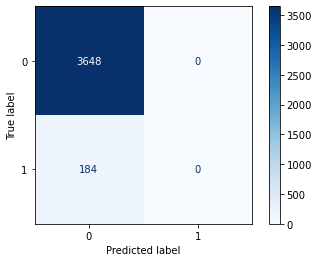

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix1, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)

In [41]:
#Performance testing

imputer = SimpleImputer()

X_test_fill_na = X_test.copy()
X_test_fill_na.fillna({"gender":"gender_missing", "smoking_status":"status_missing", "work_type":"work_missing"}, inplace=True)

#Categorical data
X_test_categorical = X_test_fill_na[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

#Normalization
X_test_numeric = X_test_fill_na[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

#Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,avg_glucose_level,age,Unknown,formerly smoked,never smoked,smokes,Female,Male,Other,Rural,Urban,0,1
42,0.414458,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
380,0.235897,0.047852,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3524,0.114625,0.707031,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
352,0.191349,0.243164,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4927,0.067953,0.121094,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,0.224079,0.450684,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1657,0.043348,0.719238,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
982,0.472948,0.009766,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3679,0.232527,0.536133,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [42]:
#Test Data - Model Evaluation 

y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)

test_model = pd.Series(test_residuals, name="Residuals (counts)").value_counts()

print(test_model)
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    1213
1      65
Name: Residuals (counts), dtype: int64

0    0.949139
1    0.050861
Name: Residuals (proportions), dtype: float64


In [43]:
cnf_matrix2 = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix2)

Confusion Matrix:
 [[1213    0]
 [  65    0]]


In [44]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 0, 'TN': 1213, 'FP': 0, 'FN': 65}

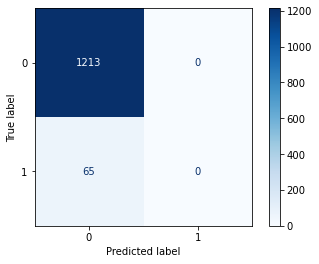

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix2, display_labels=model_log.classes_)
disp.plot(cmap=plt.cm.Blues)